In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

In [8]:
# Loading Dataset
try:
    movies_data = pd.read_csv('/content/drive/MyDrive/CodeSoft/Task 2/IMDb Movies India.csv', encoding='latin-1')
except UnicodeDecodeError:
    try:
        movies_data = pd.read_csv('/content/drive/MyDrive/CodeSoft/Task 2/IMDb Movies India.csv', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        print("Could not decode the file with latin-1 or ISO-8859-1 encoding.")
        # You might need to try other encodings or inspect the file to determine the correct one.

In [10]:
# Drop rows with missing Rating
movies_data = movies_data.dropna(subset=['Rating'])

In [15]:
# Clean and convert columns
movies_data['Votes'] = movies_data['Votes'].astype(str).str.replace(',', '').astype(float)

In [17]:
# Fill missing values
movies_data['Duration'] = movies_data['Duration'].fillna(movies_data['Duration'].median())
movies_data['Votes'] = movies_data['Votes'].fillna(0)
movies_data['Year'] = movies_data['Year'].fillna(movies_data['Year'].median())

In [19]:
# Fill NA
for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    movies_data[col] = movies_data[col].fillna("Unknown")

In [21]:
# Feature Selection
features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Duration', 'Year', 'Votes']
target = 'Rating'

X = movies_data[features]
y = movies_data[target]

In [23]:
categorical_features = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']
numeric_features = ['Duration', 'Year', 'Votes']

In [25]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', max_categories=50), categorical_features),
        ('num', 'passthrough', numeric_features)
    ]
)

In [27]:
# Full pipeline with model
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [28]:
# Train/test split and fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                max_categories=50),
                                                  ['Genre', 'Director',
                                                   'Actor 1', 'Actor 2',
                                                   'Actor 3']),
                                                 ('num', 'passthrough',
                                                  ['Duration', 'Year',
                                                   'Votes'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [32]:
# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

RMSE: 1.1428473318875605
R-squared: 0.2974728032524041


In [34]:
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Root Mean Squared Error (RMSE): 1.14
R² Score: 0.30


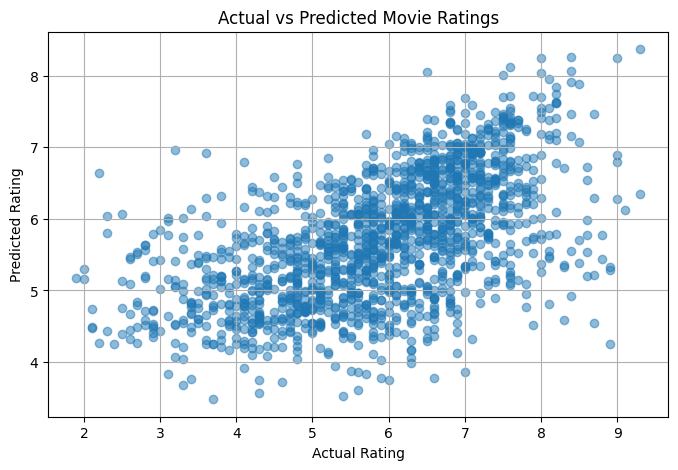

In [35]:
# Actual vs Predicted

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Rating")
plt.ylabel("Predicted Rating")
plt.title("Actual vs Predicted Movie Ratings")
plt.grid(True)
plt.show()